# Simulador de un centellador de ICs
Basado en SiRi detector de Miniscatter K. Sjobak (October 23rd 2018, January 2019)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
import ROOT
import os
import math

%matplotlib notebook
#Setup MiniScatter
import sys
MiniScatter_path="/opt/MiniScatter/build"
sys.path.append(MiniScatter_path)
#import CLEARview

import miniScatterDriver
import miniScatterScanner
import miniScatterPlots



Welcome to JupyROOT 6.22/06


In [2]:
### Basic simulation parameters ###

QUIET = False
TRYLOAD = False #Try to load already existing data instead of recomputing?

baseSimSetup = {}
#baseSimSetup["PHYS"] = "QGSP_BERT__SS"
#baseSimSetup["PHYS"] = "QGSP_BERT"
baseSimSetup["PHYS"] = "QGSP_BERT_EMV"
baseSimSetup["N"] = 100000   #number of simulated particles
baseSimSetup["BEAM"]    = "gamma"
#Disable the default target
baseSimSetup["THICK"] = 0.0

#Start beam 10 mm before center of coordinate system
baseSimSetup["ZOFFSET"] = -500

#Make three layers of not-actually-a-magnet
baseSimSetup["MAGNET"] = []

#Detector thicknesses in [mm]
thickness_e  = 400 

thickness_buffer = 5e-3 #Some distance-keeping to avoid overlaps

#Define the detector 
m1={}
m1["pos"]      =  thickness_e/2 + 2*thickness_buffer
m1["type"]     = "TARGET"
m1["length"]   = thickness_e #[mm]
m1["gradient"] = 0.0
m1["keyval"]   = {}
m1["keyval"]["material"] = "G4_CESIUM_IODIDE"
m1["keyval"]["width"]    = 45.0 #[mm]
m1["keyval"]["height"]   = 45.0 #[mm]
baseSimSetup["MAGNET"].append(m1)


baseSimSetup["WORLDSIZE"] = 50.0 #[mm], x-y size of the world

baseSimSetup["DIST"] = 5.0 #Perfect-detector position [mm] 

baseSimSetup["QUICKMODE"] = False #Include slow plots
baseSimSetup["MINIROOT"]  = True #Skip TTRees in the .root files



#Store the .root files in a subfolder from MiniScatter/examples, to be easy to find
baseSimSetup["OUTFOLDER"]=os.path.join(os.getcwd(),"Fotomultiplier_1")


In [6]:
# Beam of 2 MeV gammas
baseSimSetup_test = baseSimSetup.copy()
baseSimSetup_test["BEAM"]    = "gamma"
baseSimSetup_test["ENERGY"] = 2 

E_CUTOFF = baseSimSetup_test["ENERGY"]*0.01;#Lowest energy particles to consider for analysis
baseSimSetup_test["OUTNAME"] = "test_n"
baseSimSetup_test["MINIROOT"]     = False #I want TTrees
(twiss_test, numPart_test, objects_test,datafile_testn) = miniScatterDriver.getData_tryLoad(baseSimSetup_test,getRaw=True, tryload=TRYLOAD,\
    getObjects=["magnet_1_edep","metadata"])


TryLoad is False, computing now.
Running command line: './MiniScatter -t 0.0 -d 5.0 -w 50.0 -p QGSP_BERT_EMV -n 100000 -e 2 -b gamma -z -500 -f test_n -o /eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/examples/DeltaEE --magnet 200.01:TARGET:400.0:0.0:material=G4_CESIUM_IODIDE:width=45.0:height=45.0'
RunFolder = '/eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/build_SWAN'
logName   = '/eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/examples/DeltaEE/test_n.txt'
-
Event# 0
Event# 500
Event# 1000
Event# 1500
Event# 2000
Event# 2500
Event# 3000
Event# 3500
Event# 4000
Event# 4500
Event# 5000
Event# 5500
Event# 6000
Event# 6500
Event# 7000
Event# 7500
Event# 8000
Event# 8500
Event# 9000
Event# 9500
Event# 10000
Event# 10500
Event# 11000
Event# 11500
Event# 12000
Event# 12500
Event# 13000
Event# 13500
Event# 14000
Event# 14500
Event# 15000
Event# 15500
Event# 16000
Event# 16500
Event# 17000
Event# 17500
Event# 18000
Event# 18500
Event# 19000
Event# 19500
Event# 20000
Event# 20500

In [7]:
def resolution(raw_energy, res):
    '''
    Simulate the resolution effect from the detector
    '''
    if res == 0 or raw_energy ==0:
        return raw_energy
    else:
        random_e = np.random.normal(0,raw_energy*res/(235*math.sqrt(raw_energy)))
        return raw_energy + random_e

Warning in <TFile::Append>: Replacing existing TH1: energy_spectrum (Potential memory leak).


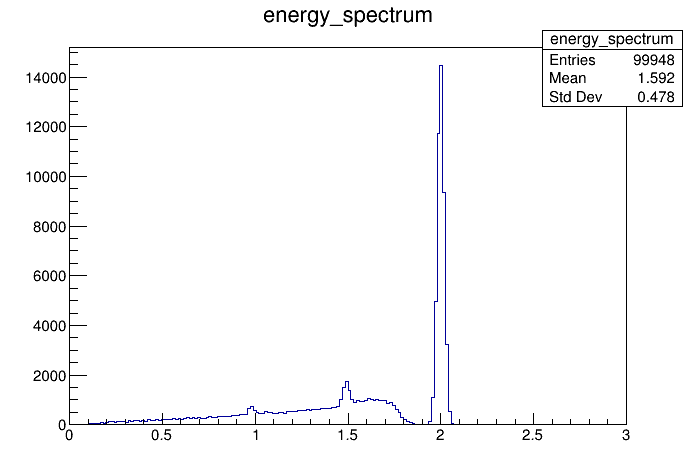

In [9]:
c1 = ROOT.TCanvas()
th = datafile_testn.Get("magnetEdeps")


h_spectum = ROOT.TH1D("energy_spectrum","energy_spectrum",200,0,3)

for i in range(th.GetEntries()):
    th.GetEntry(i)
    rawe = th.magnet_1
    if rawe == 0:continue
    else: 
        h_spectum.Fill(resolution(rawe,3))




In [ ]:
h_spectum.Draw()
c1.Draw()

In [12]:
#now we add a Pb foil before the detector 
### Basic simulation parameters ###

QUIET = False
TRYLOAD = False #Try to load already existing data instead of recomputing?

baseSimSetup = {}
#baseSimSetup["PHYS"] = "QGSP_BERT__SS"
#baseSimSetup["PHYS"] = "QGSP_BERT"
baseSimSetup["PHYS"] = "QGSP_BERT_EMV"
baseSimSetup["N"] = 50000

#Disable the default target
baseSimSetup["THICK"] = 0.0

#Start beam 10 mm before center of coordinate system
baseSimSetup["ZOFFSET"] = -500

#Make three layers of not-actually-a-magnet
baseSimSetup["MAGNET"] = []

#All thicknesses in [mm]
thickness_foil = 3
thickness_e  = 400

thickness_buffer = 5e-3 #Some distance-keeping to avoid overlaps
#Foil before detector
m1 = {}
m1["pos"]      = 0.0
m1["type"]     = "TARGET"
m1["length"]   = thickness_foil #[mm]
m1["gradient"] = 0.0
m1["keyval"] = {}
m1["keyval"]["material"] = "G4_Pb"
m1["keyval"]["width"]    = 45.0 #[mm]
m1["keyval"]["height"]   = 45.0 #[mm]
baseSimSetup["MAGNET"].append(m1)
#Detector definition
m2 = {}
m2["pos"]      = thickness_foil/2 + thickness_e/2  + 2*thickness_buffer
m2["type"]     = "TARGET"
m2["length"]   = thickness_e #[mm]
m2["gradient"] = 0.0
m2["keyval"]   = {}
m2["keyval"]["material"] = "G4_CESIUM_IODIDE"
m2["keyval"]["width"]    = 45.0 #[mm]
m2["keyval"]["height"]   = 45.0 #[mm]
baseSimSetup["MAGNET"].append(m2)


baseSimSetup["WORLDSIZE"] = 50.0 #[mm], x-y size of the world

baseSimSetup["DIST"] = 5.0 #Perfect-detector position [mm] 

baseSimSetup["QUICKMODE"] = False #Include slow plots
baseSimSetup["MINIROOT"]  = True #Skip TTRees in the .root files



#Store the .root files in a subfolder from MiniScatter/examples, to be easy to find
baseSimSetup["OUTFOLDER"]=os.path.join(os.getcwd(),"Fotomultiplier_2")

In [15]:
# Test simulation
baseSimSetup_test = baseSimSetup.copy()
baseSimSetup_test["BEAM"]    = "gamma"
baseSimSetup_test["ENERGY"] = 2 

E_CUTOFF = baseSimSetup_test["ENERGY"]*0.01;#Lowest energy particles to consider for analysis

baseSimSetup_test["OUTNAME"] = "test_n"
baseSimSetup_test["MINIROOT"]     = False #I want TTrees
(twiss_test, numPart_test, objects_test,datafile_test_withpb) = miniScatterDriver.getData_tryLoad(baseSimSetup_test,getRaw=True, tryload=TRYLOAD,\
    getObjects=["magnet_1_edep","magnet_2_edep","metadata"])

TryLoad is False, computing now.
Running command line: './MiniScatter -t 0.0 -d 5.0 -w 50.0 -p QGSP_BERT_EMV -n 50000 -e 2 -b gamma -z -500 -f test_n -o /eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/examples/Fotomultiplier_2 --magnet 0.0:TARGET:3.0:0.0:material=G4_Pb:width=45.0:height=45.0 --magnet 201.51:TARGET:400.0:0.0:material=G4_CESIUM_IODIDE:width=45.0:height=45.0'
RunFolder = '/eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/build_SWAN'
logName   = '/eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/examples/Fotomultiplier_2/test_n.txt'
-
Event# 0
Event# 500
Event# 1000
Event# 1500
Event# 2000
Event# 2500
Event# 3000
Event# 3500
Event# 4000
Event# 4500
Event# 5000
Event# 5500
Event# 6000
Event# 6500
Event# 7000
Event# 7500
Event# 8000
Event# 8500
Event# 9000
Event# 9500
Event# 10000
Event# 10500
Event# 11000
Event# 11500
Event# 12000
Event# 12500
Event# 13000
Event# 13500
Event# 14000
Event# 14500
Event# 15000
Event# 15500
Event# 16000
Event# 16500
Event# 17000
Event# 

Warning in <TFile::Append>: Replacing existing TH1: energy_spectrum (Potential memory leak).


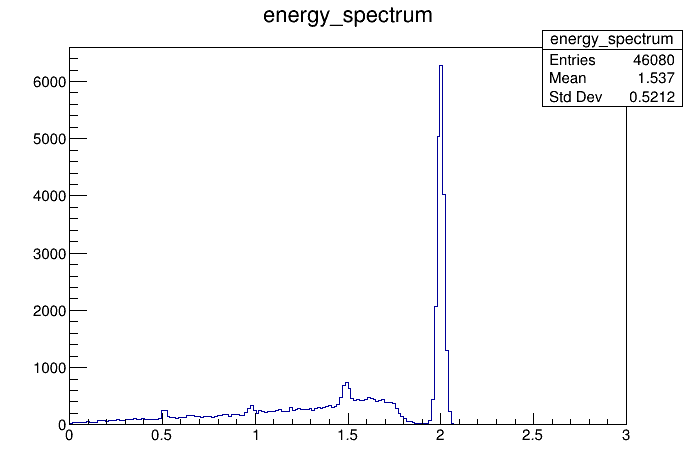

In [17]:
c1 = ROOT.TCanvas()
th = datafile_test_withpb.Get("magnetEdeps")


h_spectum = ROOT.TH1D("energy_spectrum","energy_spectrum",200,0,3)

for i in range(th.GetEntries()):
    th.GetEntry(i)
    rawe = th.magnet_2
    if rawe == 0:continue
    else: 
        h_spectum.Fill(resolution(rawe,3))




In [ ]:
h_spectum.Draw()
c1.Draw()